# ***Penguins Descriptive Analysis and Statistical Relationship***

# **Importing Libraries**

In [1]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install google-colab
!pip install imbalanced-learn

# **Importing Libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### ***Generate Random SEED and RandomState***

In [3]:
# Generate random SEED
np.random.seed(2023)
SEED = (int) ((np.random.rand()) * (14+8))
STATE = np.random.mtrand.RandomState(SEED)
print(SEED)
print(STATE)

7
RandomState(MT19937)


### ***Load the data from local repository***

In [21]:
# load the required data
PATH = './data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv'))
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### ***Load date from Google Drive***

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv')) # change path to your path
data.head()

### ***Data Preprocessing, Cleaning and Validation***

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Data Cleaning

##### *Data Type Check*

In [22]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


##### *Check for missing values*

In [27]:
# check for missing values
data.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

##### Check for repeated values

In [6]:
# check for repeated values
data.duplicated().sum()

0

##### *Extract numerical columns*

In [7]:
# list numeric columns
numericals =['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

numericals

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

##### *Extract categorical columns*

In [8]:
# list categorical columns
categorical = ['sex', 'island', 'species']
categorical

['sex', 'island', 'species']

##### *Sample Prediction Features*

In [9]:
features = ['sex', 'body_mass_g']
features

['sex', 'body_mass_g']

##### *Check for outliers*

In [10]:
# check for outliers
data[numericals].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
data[numericals].skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

##### *Check for data distribution for numerical variables*

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

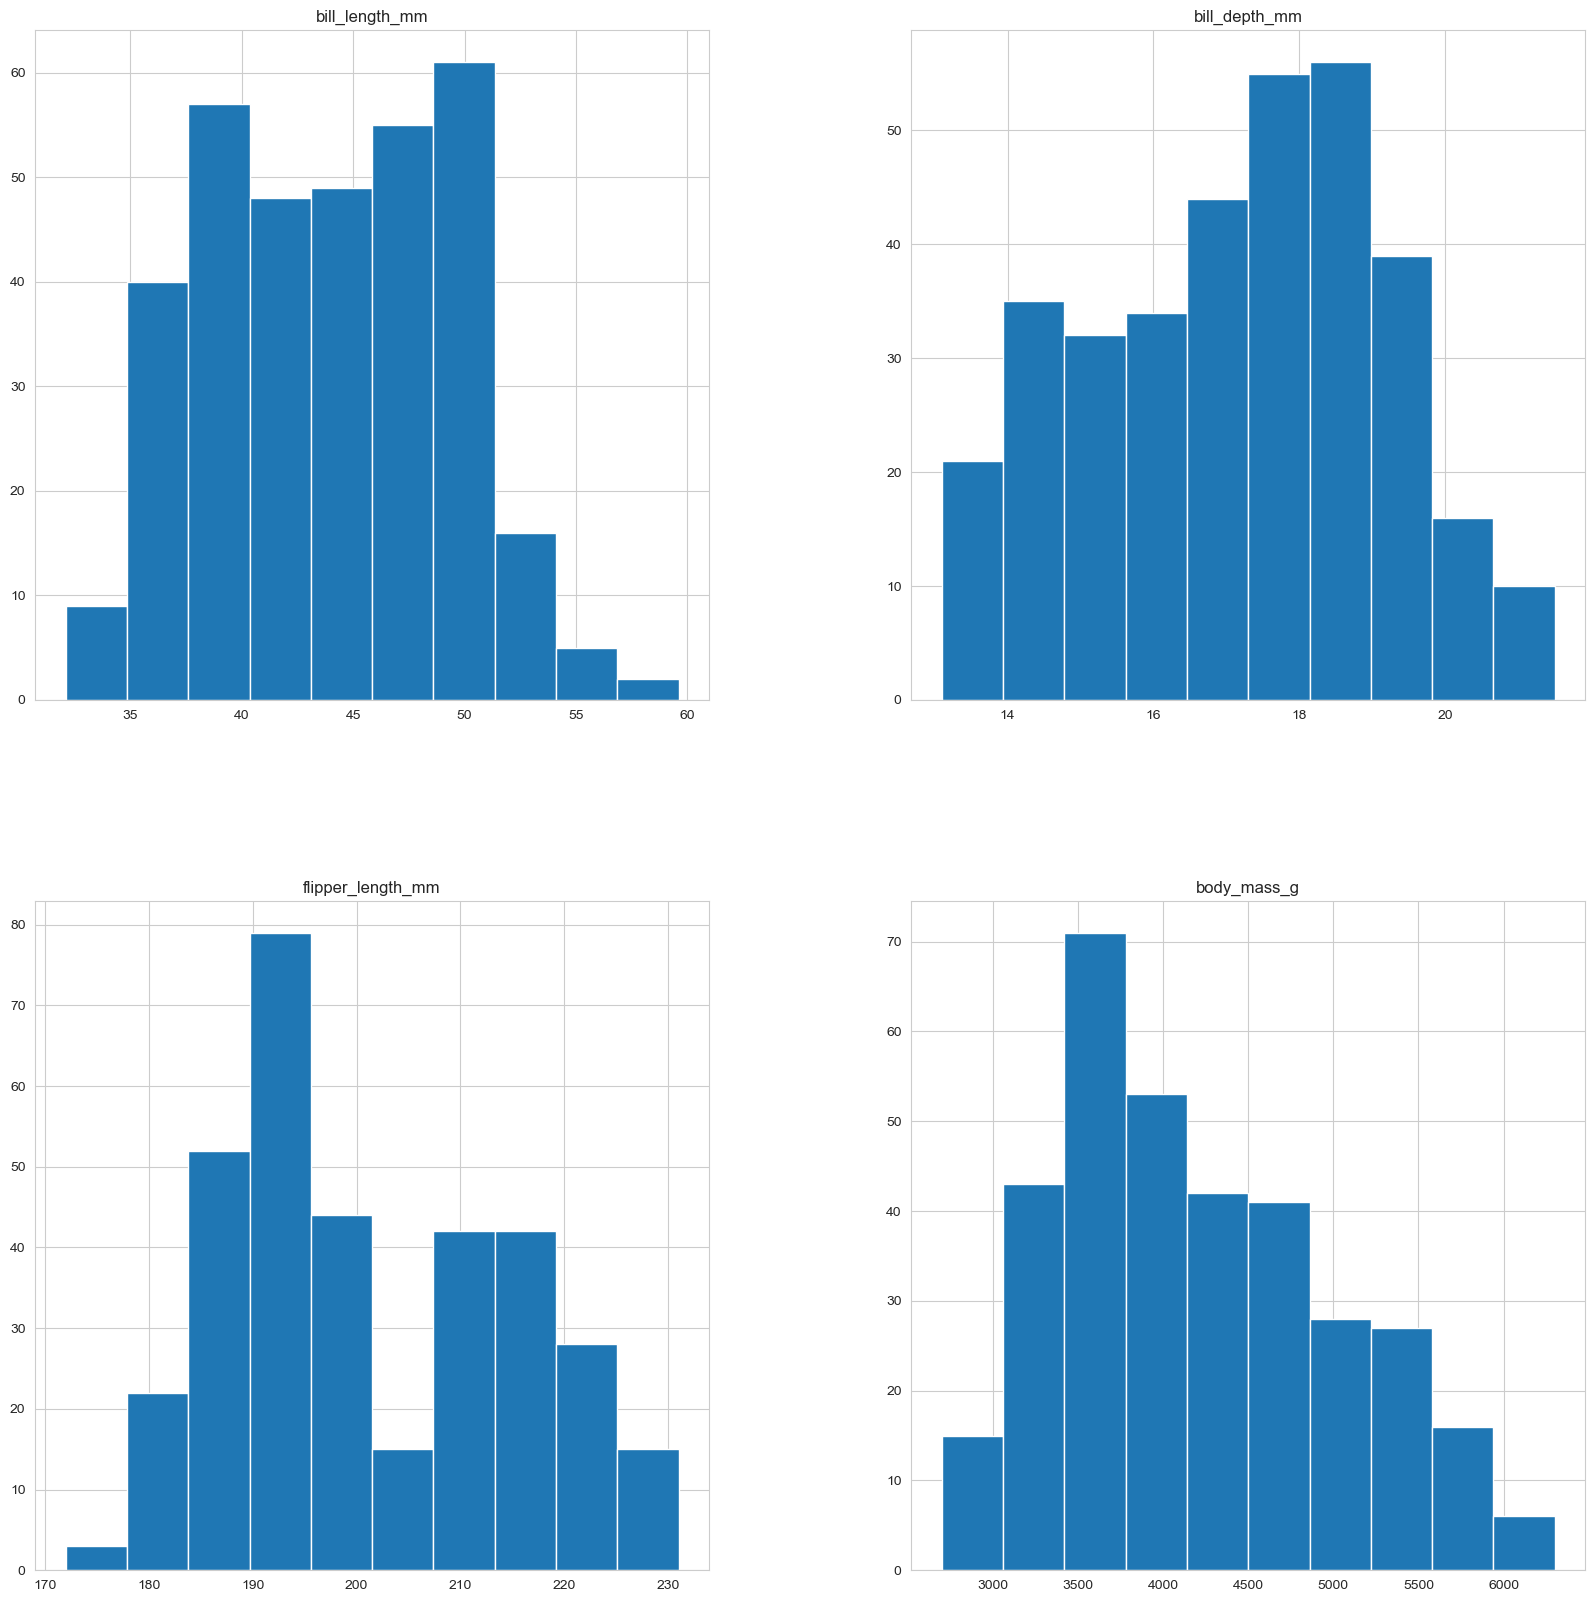

In [12]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

##### *Check for correlation between variables*

In [13]:
# check for correlation between variables
data[numericals].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

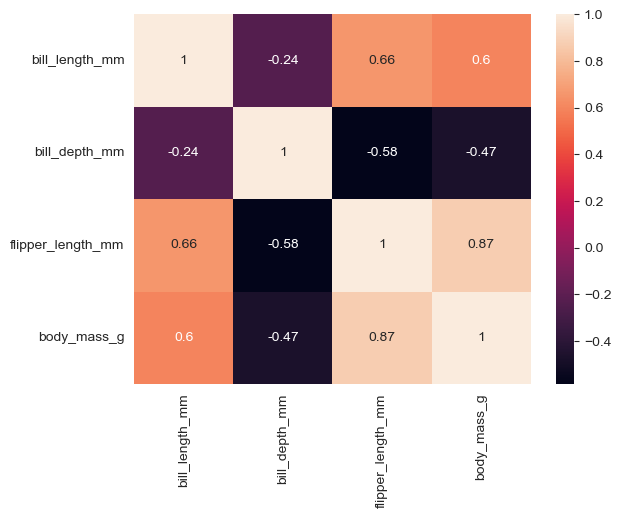

In [14]:
sns.heatmap(data[numericals].corr(), annot=True)

##### *Replace the null values with means*

In [31]:
data['sex'].replace('male' ,0, inplace=True)
data['sex'].replace('female',1, inplace=True)
data['sex'].fillna(0, inplace=True)
data.fillna(data.mean(),inplace=True)
data.head()
data

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_6724\2284744647.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,0,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,1,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,0,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,0,2009


## ***Model building***

In machine learning, model building is the process of creating a mathematical representation of a real-world process. The goal of model building is to create a model that can accurately predict the outcome of a given process based on input data. Machine learning models are created from machine learning algorithms, which are trained using either labeled, unlabeled, or mixed data. Different machine learning algorithms are suited to different goals, such as classification or prediction modeling, so data scientists use different algorithms as the basis for different models.
<br>
<br>
The problem we're modeling, now is to predict default on the specie of the penguin and also its body ass in g (body_mass_g)  or not default, the target variable is, binary and numeric respectively. Here I choose the two models

- LinearRegression
- KNearestNeighbours
- RandomForestClassifier

The choice of the model and modeling is based on few assumptions we make about the nature of our data and these assumptions include,

1. The Target Variable (Response) is a categorical variable
2. The independent variables are not multicolinear
3. The data is not very highly skewed <br>
4. There are no extreme outliers.
5. There exists a linear relationship between each explanatory variable and the logit of the response variable.
6. The sample size is sufficiently large.
7. The hypothesis is that we can predict the response variables given the data set

the choice of the model here is the logistics regression model from the sklearn model. And then we model using the data which is prepared.
we shall select the best model based on the f- score. Then conclude accordingly

### ***Prepare the Data for modeling***

In [ ]:
# Split the data for Test and Training

# split data with sex as the response
X_train, X_test, y_train, y_test = train_test_split(data.drop(['rowid', 'Sex'], axis=1),
                                                    data['Sex'],
                                                    test_size=0.3,
                                                    random_state=SEED)

X_train_mass, X_test_mass, y_train_mass, y_test_mass= train_test_split(data.drop(['rowid', 'body_mass_g'], axis=1),
                                                    data['body_mass_g'],
                                                    test_size=0.3,
                                                    random_state=SEED)




### ***Modeling using the LogisticRegression Classifier***

In [ ]:
# model building with  LogisticRegression Classifier
# model
model = LinearRegression()
# fit model
smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['regressor', model]])
pipeline.fit(X_train, y_train)

# test model
y_pred = pipeline.predict(X_test)

### ***Modeling using K-nearest Neighbours (KNN)***

In [ ]:
# modeling using the K-nearest Neighbours (KNN)
knn = KNeighborsClassifier()

# fit the model
smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', knn]])

pipeline.fit(X_train, y_train)

# test model

pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, pred))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, pred)}")
print(f"Recall: { round(recall_score(y_test, pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, pred)*100, 4) }")

### ***Modeling Using the RandomForestClassifier***

In [ ]:
# modeling using the RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=SEED)

smote_sampler = SMOTE(random_state=STATE)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(X_train, y_train)

y_pred_c = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------CLASSIFICATION REPORT -----------------------")
print(classification_report(y_test, y_pred_c))
print("-------------------------TEST SCORES-----------------------")
print(f"confusion matrix : {confusion_matrix(y_test, y_pred_c)}")
print(f"Recall: { round(recall_score(y_test, y_pred_c)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred_c)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred_c)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred_c)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred_c)*100, 4) }")

# plot feature importance's

plt.figure(figsize=(10,10))
sns.barplot(x=np.sort(rf_clf.feature_importances_), y=rf_clf.feature_names_in_,orient='h')